# Perceptron Lab





In [2]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.linear_model import Perceptron
import sklearn.datasets as skdata
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
from scipy.io import arff
from sklearn.preprocessing import LabelEncoder
from tabulate import tabulate
from IPython.display import HTML, display

## 1. (40%) Correctly implement and submit your own code for the perceptron learning algorithm. 

### Code requirements
- Shuffle the data each epoch.
- A way to create a random train/test split. Write your own. In the future you can use the scikit-learn version if you want.
- Use Stochastic/On-line training updates: Iterate and update weights after each training instance (i.e. do not attempt batch updates)
- Implement a stopping criteria: when your model has trained for a number of epochs with no significant improvement in accuracy, stop training. Note that the weights/accuracy do not usually change monotonically.
- Use your perceptron to solve the Debug data. We provide you with several parameters, and you should be able to replicate our results every time. When you are confident it is correct, run your perceptron on the Evaluation data with the same parameters, and print your final weights and accuracy.

In [3]:
class PerceptronClassifier(BaseEstimator,ClassifierMixin):
    epochs = 10
    misClassificationRate_perEpoch = []
    def __init__(self, lr=.1, shuffle=True):
        """ 
            Initialize class with chosen hyperparameters.
        Args:
            lr (float): A learning rate / step size.
            shuffle: Whether to shuffle the training data each epoch. DO NOT 
            SHUFFLE for evaluation / debug datasets.
        """
        self.lr = lr
        self.shuffle = shuffle

    def setEpochs(self, numEpochs):
        self.epochs = numEpochs

    def fit(self, X, y, initial_weights=None):
        """ 
            Fit the data; run the algorithm and adjust the weights to find a 
            good solution
        Args:
            X (array-like): A 2D numpy array with the training data, excluding
            targets
            y (array-like): A 2D numpy array with the training targets
            initial_weights (array-like): allows the user to provide initial 
            weights
        Returns:
            self: this allows this to be chained, e.g. model.fit(X,y).predict(X_test)
        """
        self.misClassificationRate_perEpoch = []
        self.weights = self.initialize_weights(X) if not initial_weights else initial_weights
        
        for epoch in range(self.epochs):
            #print("Epoch: ", epoch)
            #print(self.weights)
            missClass = 0
            for x,t in zip(X, range(len(y)-1)):
                x.append(1)
                net = np.dot(x, self.weights)
                if net > 0: z = 1
                else: z = 0
                #print(x)
                #print(y)
                for item in range(len(x)):
                    #print(self.weights[item])
                    #print(x[item])
                    #print(y[t][0])
                    self.weights[item] += (self.lr * (y[t][0] - z) * x[item])
                x.pop()
            
            #print(missClass,"/",len(y))
            missClass = 1 - self.score(X, y)
            self.misClassificationRate_perEpoch.append(missClass)

            #print(self.weights)
            if self.shuffle:
                self._shuffle_data(X,y)


        return self

    def predict(self, X):
        """ 
            Predict all classes for a dataset X
        Args:
            X (array-like): A 2D numpy array with the training data, excluding 
            targets
        Returns:
            array, shape (n_samples,)
                Predicted target values per element in X.
        """
        results = []
        for x in X:
            x.append(1)
            temp = np.dot(x, self.weights)
            if temp > 0:
                results.append(1)
            else:
                results.append(0)
            x.pop()
        return results

    def initialize_weights(self, X):
        """ Initialize weights for perceptron. Don't forget the bias!
        Returns:
        """
        temp_weight = [0]
        for i in range(len(X[0])):
            temp_weight.append(0)
        return temp_weight

    def score(self, X, y):
        """ 
            Return accuracy of model on a given dataset. Must implement own 
            score function.
        Args:
            X (array-like): A 2D numpy array with data, excluding targets
            y (array-like): A 2D numpy array with targets
        Returns:
            score : float
                Mean accuracy of self.predict(X) wrt. y.
        """
        results = self.predict(X)
        #print(results)
        
        final = 0
        # print(y)
        for item in range(len(results)):
            if y[item][0] == results[item]:
                final += 1
        final /= len(y)

        # print(final)
        
        return final

    def _shuffle_data(self, X, y):
        """ 
            Shuffle the data! This _ prefix suggests that this method should 
            only be called internally.
            It might be easier to concatenate X & y and shuffle a single 2D 
            array, rather than shuffling X and y exactly the same way, 
            independently.
        """
        Z = np.concatenate((X, y), axis=1)
        #print(Z)
        np.random.shuffle(Z)
        #print(Z)
        #np.random.shuffle(Z)
        #print(Z)
        
        # need to figure out how to calculate these 3's
        for i in range(len(y[0])-1):
            y[i][0] = Z[i][3]
        for i in range(len(X)-1):
            for j in range(len(X[0])-1):
                X[i][j] = Z[i][j]
        pass

    ### Not required by sk-learn but required by us for grading. Returns the weights.
    def get_weights(self):
        return self.weights

## 1.1 Debug and Evaluation

Debug and Evaluate your model using the parameters below

Learning Rate = 0.1 \ 
Deterministic = 10 [This means run it 10 epochs and should be the same everytime you run it] \ 
Shuffle = False \ 
Initial Weights = All zeros

---

### 1.1.1 Debug

Debug your model by running it on the [debug dataset](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/linsep2nonorigin.arff)

Expected Results:

Accuracy = [0.88]\
Final Weights = [-0.23  0.18 -0.1 ]

In [5]:
# Load debug data
!curl https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/linsep2nonorigin.arff --output debug_data.arff
debug_data = arff.loadarff('debug_data.arff')
data_df = pd.DataFrame(debug_data[0])

debug_np_data = data_df.to_numpy()
debug_np_data = debug_np_data.astype(float)
debug_np_data = debug_np_data.tolist()

X = []
y = []
for data in debug_np_data:
    X.append(data[0:len(data)-1])
    y.append([data[len(data)-1]])
#print("X: ", X)
#print("y: ", y)

# Train on debug data
perceptron11 = PerceptronClassifier(shuffle=False)
perceptron11.initialize_weights(X)
perceptron11.setEpochs(10)
perceptron11.fit(X, y)

# Print accuracy and weights
print("Final Accuracy: ", perceptron11.score(X, y))
print("Final Weights: ", perceptron11.get_weights())
print("Miss Classification:", perceptron11.misClassificationRate_perEpoch)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   197  100   197    0     0   2525      0 --:--:-- --:--:-- --:--:--  2525
Final Accuracy:  0.875
Final Weights:  [-0.23000000000000004, 0.1799999999999999, -0.1]
Miss Classification: [0.5, 0.5, 0.5, 0.5, 0.375, 0.125, 0.125, 0.125, 0.125, 0.125]


### 1.1.2 Evaluation

We will evaluate your model based on it's performance on the [evaluation dataset](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/data_banknote_authentication.arff)

In [6]:
# Load evaluation data
!curl https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/data_banknote_authentication.arff --output eval_data.arff
eval_data = arff.loadarff('eval_data.arff')
eval_df = pd.DataFrame(eval_data[0])

eval_np_data = eval_df.to_numpy()
eval_np_data = eval_np_data.astype(float)
eval_np_data = eval_np_data.tolist()

X = []
y = []
for data in eval_np_data:
    X.append(data[0:len(data)-1])
    y.append([data[len(data)-1]])
# print("X: ", X)
# print("y: ", y)

# Train on evaluation data
perceptron12 = PerceptronClassifier(shuffle=False)
perceptron12.initialize_weights(X)
perceptron12.setEpochs(10)
perceptron12.fit(X, y)

# Print accuracy and weights
print("Final Accuracy: ", perceptron12.score(X, y))
print("Final Weights: ", perceptron12.get_weights())
print("Miss Classification:", perceptron12.misClassificationRate_perEpoch)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 46685  100 46685    0     0   198k      0 --:--:-- --:--:-- --:--:--  198k
Final Accuracy:  0.9876093294460642
Final Weights:  [-3.80657242, -2.8408210000000014, -3.0719334000000034, -1.4003906000000004, 4.899999999999999]
Miss Classification: [0.5247813411078717, 0.047376093294460686, 0.02988338192419826, 0.03862973760932942, 0.037172011661807614, 0.03862973760932942, 0.007288629737609353, 0.02478134110787167, 0.023323615160349864, 0.012390670553935834]


## 2. (30%) Classifying on linearly separable and non-linearly separable data

### 2.1 Create 2 datasets

- Both with 8 instances using 2 real valued inputs (ranging between -1 and 1) with 4 instances from each class. 
- One data set should be linearly separable and the other not.



In [7]:
# Create 2 datasets

# un-separable dataset
inputs1 = [[-0.65, 0.78,], [0.02, -0.34], [0.15, 0.46], [-0.4, -0.5], [0.75, 0.75], [0.001, 0.002], [-0.02, -0.6], [0.15, -0.025]]
targets1 = [[0], [0], [0], [0], [1], [1], [1], [1]]

# separable dataset
inputs2 = [[-0.65, 0.78,], [0.02, -0.34], [0.15, 0.46], [-0.4, -0.5], [0.75, 0.75], [0.001, 0.002], [-0.02, -0.6], [0.15, -0.025]]
targets2 = [[0], [1], [0], [0], [1], [0], [1], [1]]

### 2.2 Train on both sets with your perceptron code (with LR=.1)

In [8]:
# Train on each dataset
# un-sep
perceptron = PerceptronClassifier(shuffle=False)
perceptron.initialize_weights(inputs1)
perceptron.setEpochs(10)
perceptron.fit(inputs1, targets1)

print("Final Accuracy: ", perceptron.score(inputs1, targets1))
print("Final Weights: ", perceptron.get_weights())

# sep
perceptron2 = PerceptronClassifier(shuffle=False)
perceptron2.initialize_weights(inputs2)
perceptron2.setEpochs(10)
perceptron2.fit(inputs2, targets2)

print("Final Accuracy: ", perceptron2.score(inputs2, targets2))
print("Final Weights: ", perceptron2.get_weights())

Final Accuracy:  0.625
Final Weights:  [0.2605999999999999, -0.060799999999999965, 0.1]
Final Accuracy:  1.0
Final Weights:  [0.21360000000000007, -0.13779999999999998, 0.0]


### 2.3 Graph the datasets and their corresponding decision line
 
 - Graph each dataset
 - Use your trained perceptrons above to determine each dataset's decision line
 - For all graphs always label the axes!
 
![Linearly Separable Data](https://raw.githubusercontent.com/rmorain/CS472-1/master/images/perceptron/linearly_separable.png)

![Not Linearly Separable](https://raw.githubusercontent.com/rmorain/CS472-1/master/images/perceptron/not_linearly_separable.png)

<function matplotlib.pyplot.show(close=None, block=None)>

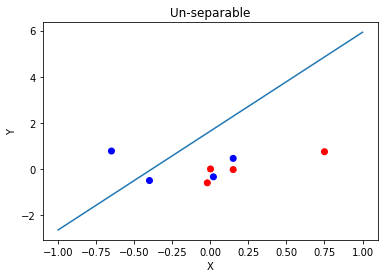

In [9]:
from itertools import chain
# un-separable
inputs1 = [[-0.65, 0.78,], [0.02, -0.34], [0.15, 0.46], [-0.4, -0.5], [0.75, 0.75], [0.001, 0.002], [-0.02, -0.6], [0.15, -0.025]]
targets1 = [[0], [0], [0], [0], [1], [1], [1], [1]]

# Graph datasets and decision lines
colors = ["blue", "red"]
colormap = matplotlib.colors.ListedColormap(colors)

# un-sep
plt_un = plt
targets1Flat = list(chain.from_iterable(targets1))

X1 = []
Y1 = []
for item in inputs1:
    X1.append(item[0])
    Y1.append(item[1])
#print(X1)
#print(Y1)

inputs1, targets1 = skdata.load_boston(return_X_y=True)
plt_un.title('Un-separable')
plt_un.xlabel('X')
plt_un.ylabel('Y')

plt_un.scatter(X1, Y1, c=targets1Flat, cmap=colormap)

weights1 = perceptron.get_weights()
x_line1 = np.arange(-1,2)
y_line1 = (-weights1[0]/weights1[1])* x_line1 - (weights1[2]/weights1[1]) 
plt_un.plot(x_line1,y_line1)

plt_un.show




<function matplotlib.pyplot.show(close=None, block=None)>

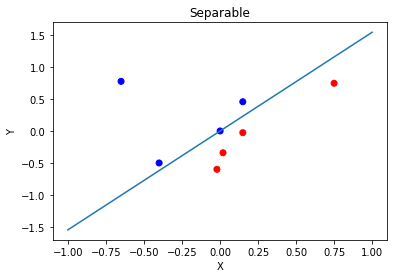

In [10]:
# separable
inputs2 = [[-0.65, 0.78,], [0.02, -0.34], [0.15, 0.46], [-0.4, -0.5], [0.75, 0.75], [0.001, 0.002], [-0.02, -0.6], [0.15, -0.025]]
targets2 = [[0], [1], [0], [0], [1], [0], [1], [1]]


# Graph datasets and decision lines
colors = ["blue", "red"]
colormap = matplotlib.colors.ListedColormap(colors)

# sep
targets2Flat = list(chain.from_iterable(targets2))

X2 = []
Y2 = []
for item in inputs2:
    X2.append(item[0])
    Y2.append(item[1])

inputs2, targets2 = skdata.load_boston(return_X_y=True)
plt.title('Separable')
plt.xlabel('X')
plt.ylabel('Y')
plt.scatter(X2, Y2, c=targets2Flat, cmap=colormap)


weights2 = perceptron2.get_weights()
x_line2 = np.arange(-1,2)
y_line2 = (-weights2[0]/weights2[1])* x_line2 - (weights2[2]/weights2[1]) 
plt_un.plot(x_line2,y_line2)



plt.show

### 2.4 Discuss why the perceptron won’t converge on non-linearly separable data.

*Discussion goes here*
A perceptron won't converge on non-lineraly separable data because no straight line will be able to fully accurately separate the data. This means that this problem is not linearly solveable. Therefore, the line will continue to float around all the possible spots, but won't set on one answer.

## 3. (20%) Use your perceptron code to learn this version of the [voting data set](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/voting-dataset.arff).

This particular task is an edited version of the standard voting set, where we have replaced all the “don’t know” values with the most common value for the particular attribute.  

### 3.1 Create a table that reports the final training and test set accuracy and the number of epochs for each trial.

- Try it five times with different random 70/30 splits. 
- Use your own code to randomize and make splits. 
- Report the 5 trials and the average across the 5 trials in a table.  

| Trial | Training Accuracy | Test accuracy | Number of epochs |
| --- | --- | --- | --- |
| 1 | .95 | .55 | 4 |
| 2 | .85 | .45 | 6 |
| Average | .9 | .5 | 5 | 

*- As a rough sanity check, typical Perceptron test accuracies for the voting data set are 90%-98%.*


In [189]:
# Create the table any way you like
!curl https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/voting-dataset.arff --output voting_data.arff
voting_data = arff.loadarff('voting_data.arff')
voting_df = pd.DataFrame(voting_data[0])

#voting_np_data = voting_df.apply(LabelEncoder().fit_transform)
#voting_np_data = voting_np_data.to_numpy()
#voting_np_data = voting_np_data.tolist()
#print(voting_np_data[0])

table = []
#table.append(["Ex", 0.0, 1.0, 2.0, 5])

# randomly split data 70/30
# 0 = 'n', 1 = 'y', 0 = 'democrat'

# --------------------- 1 ----------------------
train1 = voting_df.sample(frac=0.7,random_state=200)
test1 = voting_df.drop(train1.index)

train1_np = train1.apply(LabelEncoder().fit_transform)
train1_np = train1_np.to_numpy()
train1_np = train1_np.astype(float)
train1_np = train1_np.tolist()
#print(train1_np)

test1_np = test1.apply(LabelEncoder().fit_transform)
test1_np = test1_np.to_numpy()
test1_np = test1_np.astype(float)
test1_np = test1_np.tolist()

X1_train = []
y1_train = []
for data in train1_np:
    X1_train.append(data[0:len(data)-1])
    y1_train.append([data[len(data)-1]])

X1_test = []
y1_test = []
for data in test1_np:
    X1_test.append(data[0:len(data)-1])
    y1_test.append([data[len(data)-1]])

#print(y1_test)

perceptron_1 = PerceptronClassifier(shuffle=False)
perceptron_1.initialize_weights(X1_train)
perceptron_1.setEpochs(13)
perceptron_1.fit(X1_train, y1_train)
list_of_miss_calc1 = perceptron_1.misClassificationRate_perEpoch
table.append([1, perceptron_1.score(X1_train, y1_train), perceptron_1.score(X1_test, y1_test), perceptron_1.epochs])

# --------------------- 2 ----------------------
train2 = voting_df.sample(frac=0.7,random_state=175)
test2 = voting_df.drop(train2.index)

train2_np = train2.apply(LabelEncoder().fit_transform)
train2_np = train2_np.to_numpy()
train2_np = train2_np.astype(float)
train2_np = train2_np.tolist()
#print(train1_np)

test2_np = test2.apply(LabelEncoder().fit_transform)
test2_np = test2_np.to_numpy()
test2_np = test2_np.astype(float)
test2_np = test2_np.tolist()

X2_train = []
y2_train = []
for data in train2_np:
    X2_train.append(data[0:len(data)-1])
    y2_train.append([data[len(data)-1]])

X2_test = []
y2_test = []
for data in test2_np:
    X2_test.append(data[0:len(data)-1])
    y2_test.append([data[len(data)-1]])

perceptron_2 = PerceptronClassifier(shuffle=False)
perceptron_2.initialize_weights(X2_train)
perceptron_2.setEpochs(15)
perceptron_2.fit(X2_train, y2_train)
list_of_miss_calc2 = perceptron_2.misClassificationRate_perEpoch
table.append([2, perceptron_2.score(X2_train, y2_train), perceptron_2.score(X2_test, y2_test), perceptron_2.epochs])

# --------------------- 3 ----------------------
train3 = voting_df.sample(frac=0.7,random_state=150)
test3 = voting_df.drop(train3.index)

train3_np = train3.apply(LabelEncoder().fit_transform)
train3_np = train3_np.to_numpy()
train3_np = train3_np.astype(float)
train3_np = train3_np.tolist()
#print(train1_np)

test3_np = test3.apply(LabelEncoder().fit_transform)
test3_np = test3_np.to_numpy()
test3_np = test3_np.astype(float)
test3_np = test3_np.tolist()

X3_train = []
y3_train = []
for data in train3_np:
    X3_train.append(data[0:len(data)-1])
    y3_train.append([data[len(data)-1]])

X3_test = []
y3_test = []
for data in test3_np:
    X3_test.append(data[0:len(data)-1])
    y3_test.append([data[len(data)-1]])

perceptron_3 = PerceptronClassifier(shuffle=False)
perceptron_3.initialize_weights(X3_train)
perceptron_3.setEpochs(17)
perceptron_3.fit(X3_train, y3_train)
list_of_miss_calc3 = perceptron_3.misClassificationRate_perEpoch
table.append([3, perceptron_3.score(X3_train, y3_train), perceptron_3.score(X3_test, y3_test), perceptron_3.epochs])    

# --------------------- 4 ----------------------
train4 = voting_df.sample(frac=0.7,random_state=125)
test4 = voting_df.drop(train4.index)

train4_np = train4.apply(LabelEncoder().fit_transform)
train4_np = train4_np.to_numpy()
train4_np = train4_np.astype(float)
train4_np = train4_np.tolist()
#print(train1_np)

test4_np = test4.apply(LabelEncoder().fit_transform)
test4_np = test4_np.to_numpy()
test4_np = test4_np.astype(float)
test4_np = test4_np.tolist()

X4_train = []
y4_train = []
for data in train4_np:
    X4_train.append(data[0:len(data)-1])
    y4_train.append([data[len(data)-1]])

X4_test = []
y4_test = []
for data in test4_np:
    X4_test.append(data[0:len(data)-1])
    y4_test.append([data[len(data)-1]])

perceptron_4 = PerceptronClassifier(shuffle=False)
perceptron_4.initialize_weights(X4_train)
perceptron_4.setEpochs(18)
perceptron_4.fit(X4_train, y4_train)
list_of_miss_calc4 = perceptron_4.misClassificationRate_perEpoch
table.append([4, perceptron_4.score(X4_train, y4_train), perceptron_4.score(X4_test, y4_test), perceptron_4.epochs])

# --------------------- 5 ----------------------
train5 = voting_df.sample(frac=0.7,random_state=100)
test5 = voting_df.drop(train5.index)

train5_np = train5.apply(LabelEncoder().fit_transform)
train5_np = train5_np.to_numpy()
train5_np = train5_np.astype(float)
train5_np = train5_np.tolist()
#print(train1_np)

test5_np = test5.apply(LabelEncoder().fit_transform)
test5_np = test5_np.to_numpy()
test5_np = test5_np.astype(float)
test5_np = test5_np.tolist()

X5_train = []
y5_train = []
for data in train5_np:
    X5_train.append(data[0:len(data)-1])
    y5_train.append([data[len(data)-1]])

X5_test = []
y5_test = []
for data in test5_np:
    X5_test.append(data[0:len(data)-1])
    y5_test.append([data[len(data)-1]])

perceptron_5 = PerceptronClassifier(shuffle=False)
perceptron_5.initialize_weights(X5_train)
perceptron_5.setEpochs(16)
perceptron_5.fit(X5_train, y5_train)
list_of_miss_calc5 = perceptron_5.misClassificationRate_perEpoch
table.append([5, perceptron_5.score(X5_train, y5_train), perceptron_5.score(X5_test, y5_test), perceptron_5.epochs])

# report the 5 trials and the average across the 5 trials in a table
headers = ["Trial", "Training Accuracy", "Test Accuracy", "Number of Epochs"]

avg_training = 0
avg_test = 0
avg_epochs = 0
for row in table:
    avg_training += row[1]
    avg_test += row[2]
    avg_epochs += row[3]
avg_training /= len(table)
avg_test /= len(table)
avg_epochs /= len(table)

table.append(["Average", avg_training, avg_test, avg_epochs])
display(HTML(tabulate(table, headers=headers, tablefmt='html')))

headers2 = ["W1", "W2", "W3", "W4", "W5", "W6", "W7", "W8", "W9", "W10", "W11", "W12", "W13", "W14", "W15", "W16", "B"]
table2 = []
table2.append(perceptron_1.get_weights())
table2.append(perceptron_2.get_weights())
table2.append(perceptron_3.get_weights())
table2.append(perceptron_4.get_weights())
table2.append(perceptron_5.get_weights())

avg = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
for row in table2:
    avg = np.add(row, avg)

avg /= len(table)

table2.append(avg)

display(HTML(tabulate(table2, headers=headers2, tablefmt='html')))

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 43825  100 43825    0     0   460k      0 --:--:-- --:--:-- --:--:--  460k


Trial,Training Accuracy,Test Accuracy,Number of Epochs
1,0.863777,0.862319,13
2,0.950464,0.92029,15
3,0.959752,0.934783,17
4,0.962848,0.927536,18
5,0.959752,0.934783,16
Average,0.939319,0.915942,15.8


W1,W2,W3,W4,W5,W6,W7,W8,W9,W10,W11,W12,W13,W14,W15,W16,B
-0.3,-0.5,-1,1,0.1,-0.4,0.1,0.8,-1,-0.1,-1,0.5,0.1,0.2,-0.1,0.1,-0.8
0.2,-0.3,-0.8,1.4,0.8,-2.77556e-17,0.6,0.8,-0.5,0.2,-0.8,0.2,0.1,2.77556e-17,-0.4,0.1,-0.9
0.4,0.1,-0.8,1.6,0.8,-0.3,0.1,1,-0.5,0.6,-0.8,0.3,0.5,-0.1,-0.7,0.1,-1.6
-0.1,2.77556e-17,-0.7,1.8,0.3,-0.3,0.3,0.4,-0.6,0.1,-1.3,0.4,0.2,2.77556e-17,-0.9,0.4,-0.3
-0.3,0.1,-1.1,1.5,0.4,-0.1,0.6,0.3,-2.77556e-17,0.5,-1,-2.77556e-17,-0.1,-0.3,-0.6,0.3,-0.9
-0.0166667,-0.1,-0.733333,1.21667,0.4,-0.183333,0.283333,0.55,-0.433333,0.216667,-0.816667,0.233333,0.133333,-0.0333333,-0.45,0.166667,-0.75


### 3.2 By looking at the weights, explain what the model has learned and how the individual input features affect the result. Which specific features are most critical for the voting task, and which are least critical? 


*Explanation goes here*: 
<br> Critical: 
<br>Negatively Impact: adoption of the budget resolution: -0.733, synfuels corporation cutback: -0.817. 
<br>Positively Impact: physician fee freeze: 1.217, aid to nicaraguan contras: 0.55. 
<br> Least Critical: handicapped infants: -0.01671, crime: -0.033

### 3.3 Make a graph of the average misclassification rate vs epochs (0th – final epoch).

- Average the misclassification rate for the training set across your 5 trials (not across 5 epochs).


![Average Misclassification Rate](https://raw.githubusercontent.com/rmorain/CS472-1/master/images/perceptron/avg_misclassification_rate_vs_epochs.png)

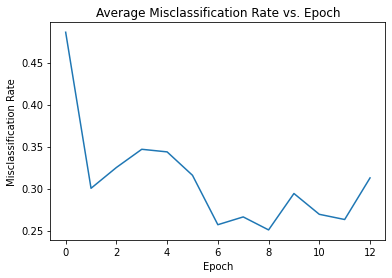

In [153]:
# Graph here

collected_missClass = []
collected_missClass.append(list_of_miss_calc1)
collected_missClass.append(list_of_miss_calc2)
collected_missClass.append(list_of_miss_calc3)
collected_missClass.append(list_of_miss_calc4)
collected_missClass.append(list_of_miss_calc5)

minLength = 1000
for item in collected_missClass:
    if minLength > len(item):
        minLength = len(item)
#print(minLength)
#print(collected_missClass)
editedList = []
for item in collected_missClass:
    editedList.append(item[0:minLength])

#print(editedList)
newList = np.sum(editedList, 0)
#print(newList)



#sum_missClass = [sum(i) for i in zip(*average_missClass)]

    
def plot_misclassification(avg_misclassification_rate):
    """
        Plots the average misclassification rate
    Args:
        avg_misclassification_rate (array-like): A 1D array or list
    """
    plt.plot(np.arange(len(avg_misclassification_rate)), avg_misclassification_rate)
    plt.title("Average Misclassification Rate vs. Epoch")
    plt.xlabel("Epoch")
    plt.ylabel("Misclassification Rate")
    plt.show()

#print(average_missClass)
plot_misclassification(newList)

## 4.1 (5%) Use the perceptron algorithm from the [scikit-learn toolkit](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html) to learn the voting task above.
- Report and compare your results with your own perceptron code.

In [201]:

# Load sklearn perceptron
clf = Perceptron(max_iter=15, shuffle=True, random_state=0)
y1_train_flat = list(chain.from_iterable(y1_train))
# Train on voting dataset
clf.fit(X1_train, y1_train_flat)

y1_test_flat = list(chain.from_iterable(y1_test))
clf.score(X1_test, y1_test_flat)

0.9202898550724637

*Report your comparison*: Using the Scikit-learn Perceptron, I was able to achieve 92% accuracy. And with my Perceptron, I achieved 86.2% accuracy using the same dataset between each models. However, for other dataset trials my model outperformed the sklearn Perceptron. These differences I think could be explained by hyperparameters that are used.


## 4.2 (5%) Use the perceptron algorithm from the [scikit-learn toolkit](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html) to learn one other data set of your choice.
- Try out some of the hyper-parameters that scikit-learn makes available.

0.939176245210728
[ 0.4     1.062  -0.66   -2.244  -3.6522 10.9594  4.1028 -6.4332]


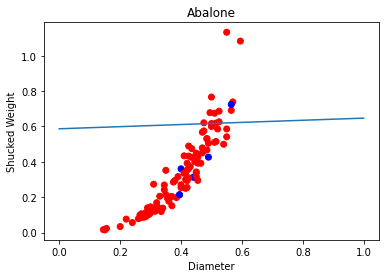

In [152]:

# Load sklearn perceptron
clf2 = Perceptron(max_iter=10000, shuffle=True, fit_intercept=True, eta0=0.4)
#print(os.getcwd())
data = pd.read_csv("../../../../../../Downloads/abalone.data")
#print(data)

custom_mapping = {'M':2, 'F':1, 'I':0}
custom_mapping2 = {1:1,
                    2:1,
                    3:1,
                    4:1,
                    5:1,
                    6:1,
                    7:1,
                    8:1,
                    9:1,
                    10:1,
                    11:1,
                    12:1,
                    13:1,
                    14:1,
                    15:1,
                    16:0,
                    17:0,
                    18:0,
                    19:0,
                    20:0,
                    21:0,
                    22:0,
                    23:0,
                    24:0,
                    25:0,
                    26:0,
                    27:0,
                    28:0,
                    29:0}
data['M'] = data['M'].map(custom_mapping)
data['15'] = data['15'].map(custom_mapping2)

# print(data.head())
data = data.to_numpy()

#print(data)
myDf = pd.DataFrame(data, columns = ['Sex', 'Length', 'Diameter', 'Height', 'Whole Weight', 'Shucked Weight', 'Viscera Weight', 'Shell Weight', 'Rings'])
#print(myDf)
toSplit = myDf.to_numpy()
#print(toSplit)

SKIP_EVERY = 40

X = []
y = []
y2 = []
it = 0
for item in toSplit:
    #print(item)
    X.append(item[0:len(item)-1])
    y.append(item[len(item)-1])
    if it % SKIP_EVERY == 0:
        y2.append([item[len(item)-1]])
    it += 1
#print(X[0])
#print(y[0])

# Train on your dataset
clf2.fit(X, y)
print(clf2.score(X, y))
#print(clf2.coef_)

X2 = []
X22 = []
it = 0
X_COL = 2
Y_COL = 5
for x in X:
    if it % SKIP_EVERY == 0:
        X2.append(x[X_COL])
    it += 1
it = 0
for x in X:
    if it % SKIP_EVERY == 0:
        X22.append(x[Y_COL])
    it += 1

columns = ['Sex', 'Length', 'Diameter', 'Height', 'Whole Weight', 'Shucked Weight', 'Viscera Weight', 'Shell Weight', 'Rings']
colors = ["blue", "red"]
colormap = matplotlib.colors.ListedColormap(colors)
X, y = skdata.load_boston(return_X_y=True)
plt.title('Abalone')
plt.xlabel(columns[X_COL])
plt.ylabel(columns[Y_COL])
plt.scatter(X2, X22, c=y2, cmap=colormap)


weights2 = clf2.coef_[0]
print(weights2)
x_line2 = np.arange(0,2)
y_line2 = (-weights2[X_COL]/weights2[Y_COL]) * x_line2 - (weights2[len(weights2)-1]/weights2[Y_COL])
plt.plot(x_line2,y_line2)

plt.show()


*Report what hyperparameters you experimented with & what performed well*
<br> - I noticed that when I played with the learning rate, it didn't affect my end accuracy, however it affected the magnitude of each of the weights. Which was to be expected.
<br> - I also played with the number of iterations, which converged after a certain number of iterations. Where maxIter > 1000 did not affect the accuracy that much. I am thinking that this could be potentially due to overfitting?
<br> - Shuffle interestingly enough provided for a more accurate model. It would make sense that it would help generalize, especially with the larger data size. 
<br> - And the final hyperparameter that I played with was fit_intercept. This was an interesting one to play with, because to my knowledge it determined if the bias was used or not. I found that using the bias, the model was incredibly more accurate. Which was to be expected. 

## 5. (Optional 5% extra credit) Use the perceptron rule to learn the [iris task](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/iris.arff) or some other task with more than two possible output values. 

Note that the [iris data](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/iris.arff) set has 3 output classes, and a perceptron node only has two possible outputs.  You could implement either of the two most common ways to deal with this. For testing you just execute the novel instance on each model and combine the overall results to see which output class wins.

In [183]:
!curl https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/iris.arff --output iris_data.arff
iris_data = arff.loadarff('iris_data.arff')
iris_df0 = pd.DataFrame(iris_data[0])
iris_df1 = pd.DataFrame(iris_data[0])
iris_df2 = pd.DataFrame(iris_data[0])

#print(iris_df)
custom_mapping_iris0 = {'Iris-setosa':1, 'Iris-versicolor':0, 'Iris-virginica':0}
custom_mapping_iris1 = {'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':0}
custom_mapping_iris2 = {'Iris-setosa':0, 'Iris-versicolor':0, 'Iris-virginica':1}

iris_df0['class'] = iris_df0['class'].str.decode("utf-8")
iris_df0['class'] = iris_df0['class'].map(custom_mapping_iris0)
iris_df1['class'] = iris_df1['class'].str.decode("utf-8")
iris_df1['class'] = iris_df1['class'].map(custom_mapping_iris1)
iris_df2['class'] = iris_df2['class'].str.decode("utf-8")
iris_df2['class'] = iris_df2['class'].map(custom_mapping_iris2)

#print(iris_df)
iris_np0 = iris_df0.to_numpy()
iris_np1 = iris_df1.to_numpy()
iris_np2 = iris_df2.to_numpy()
#print(iris_np0)

XI0 = []
yI0 = []
for item in iris_np0:
    XI0.append(item[0:len(item)-1])
    yI0.append(item[len(item)-1])

XI1 = []
yI1 = []
for item in iris_np1:
    XI1.append(item[0:len(item)-1])
    yI1.append(item[len(item)-1])

XI2 = []
yI2 = []
for item in iris_np2:
    XI2.append(item[0:len(item)-1])
    yI2.append(item[len(item)-1])

clf0 = Perceptron(max_iter=150, shuffle=True, random_state=1)
clf1 = Perceptron(max_iter=150, shuffle=True, random_state=1)
clf2 = Perceptron(max_iter=150, shuffle=True, random_state=1)

clf0.fit(XI0, yI0)
print(clf0.score(XI0, yI0))

clf1.fit(XI1, yI1)
print(clf1.score(XI1, yI1))

clf2.fit(XI2, yI2)
print(clf2.score(XI2, yI2))

print('[setosa:{x:.3f}, versicolor:{y:.3f}, virginica:{z:.3f}]'.format(x=1/2.447, y=0.62/2.447, z=0.827/2.447))
print('Weights: [setosa:{x}, versicolor:{y}, virginica:{z}]'.format(x=clf0.coef_[0], y=clf1.coef_[0], z=clf2.coef_[0]))

#y1_train_flat = list(chain.from_iterable(y1_train))
# Train on voting dataset
#clf.fit(X1_train, y1_train_flat)

#y1_test_flat = list(chain.from_iterable(y1_test))
#clf.score(X1_test, y1_test_flat)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  7485  100  7485    0     0  91280      0 --:--:-- --:--:-- --:--:-- 91280
1.0
0.62
0.8266666666666667
[setosa:0.409, versicolor:0.253, virginica:0.338]
Weights: [setosa:[ 1.3  5.1 -8.  -3.5], versicolor:[ 15.9 -31.9  11.  -28. ], virginica:[-36.1 -35.4  62.5  57.5]]
